In [1]:
!pip install -q seaborn

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

print(tf.__version__)
# To make the results reproducible, set the random seed value.
tf.random.set_seed(22)

2.9.2


Set up the data. Features were from the url site I think, this will cahnge depending on where we get our data

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)


In [4]:
dataset1 = pd.read_csv(url, names=column_names)

In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         569 non-null    int64  
 1   diagnosis                  569 non-null    object 
 2   radius_mean                569 non-null    float64
 3   texture_mean               569 non-null    float64
 4   perimeter_mean             569 non-null    float64
 5   area_mean                  569 non-null    float64
 6   smoothness_mean            569 non-null    float64
 7   compactness_mean           569 non-null    float64
 8   concavity_mean             569 non-null    float64
 9   concave_poinits_mean       569 non-null    float64
 10  symmetry_mean              569 non-null    float64
 11  fractal_dimension_mean     569 non-null    float64
 12  radius_ste                 569 non-null    float64
 13  texture_ste                569 non-null    float64

In [6]:
dataset1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
%cd drive/MyDrive/

/content/drive/MyDrive


Dataset from Kaggle

In [8]:
dataset = pd.read_csv('data_out.csv')
dataset.head()

,Unnamed: 0,GPS Speed (Meters/second),Altitude,Bearing,Engine Coolant Temperature(°C),Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Mass Air Flow Rate(g/s),Throttle Position(Manifold)(%),labels
0,0,2.795157,250,211.6,56,2623.25,30,92.549019,33.759998,32.549019,1
1,1,0.000000,255,0.0,56,3169.50,30,90.980392,37.200001,32.549019,1
2,2,0.000000,247,0.0,56,2587.50,30,98.431374,35.180000,37.647060,1
3,3,0.000000,225,0.0,57,2753.00,30,98.039215,38.040001,39.215687,1
4,4,0.000000,225,0.0,57,2957.00,30,96.862747,39.349998,38.823528,1


In [9]:
#dataset.to_xml('Project3:VDP/dataset2_1103.xml')

In [10]:
dataset3 = pd.read_json('Copy of dataset_1103.json')

In [11]:
dataset3

,Unnamed: 0,GPS Speed (Meters/second),Altitude,Bearing,Engine Coolant Temperature(°C),Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Mass Air Flow Rate(g/s),Throttle Position(Manifold)(%),labels
0,0,2.795157,250,211.6,56,2623.25,30,92.549019,33.759998,32.549019,1
1,1,0.000000,255,0.0,56,3169.50,30,90.980392,37.200001,32.549019,1
2,2,0.000000,247,0.0,56,2587.50,30,98.431374,35.180000,37.647060,1
3,3,0.000000,225,0.0,57,2753.00,30,98.039215,38.040001,39.215687,1
4,4,0.000000,225,0.0,57,2957.00,30,96.862747,39.349998,38.823528,1
...,...,...,...,...,...,...,...,...,...,...,...
1351,1351,2.946795,272,271.7,89,718.75,32,47.843140,3.920000,16.470589,0
1352,1352,2.936818,272,271.7,89,798.25,32,46.666668,3.750000,16.470589,0
1353,1353,2.926175,272,271.6,89,799.00,32,37.647060,2.260000,15.294118,0
1354,1354,2.926175,272,271.6,89,784.25,32,33.333332,2.320000,15.294118,0


# Preprocessing

Split the dataset into training and test sets using pandas.DataFrame.sample, pandas.DataFrame.drop and pandas.DataFrame.iloc. Make sure to split the features from the target labels. The test set is used to evaluate your model's generalizability to unseen data.

In [12]:
train_dataset1 = dataset1.sample(frac=0.75, random_state=1)

In [13]:
train_dataset = dataset.sample(frac = 0.75, random_state=1)

In [14]:
len(train_dataset)

1017

In [19]:
test_dataset1 = dataset1.drop(train_dataset1.index)

In [16]:
test_dataset = dataset.drop(train_dataset.index)

In [17]:
len(test_dataset)

339

So x is the features this model will be trained on, y is the label. y is actually the diagnosis column, which is the 'target label' or so the tutorial said

In [20]:
x_train1, y_train1 = train_dataset1.iloc[:, 2:], train_dataset1.iloc[:, 1]
x_test1, y_test1 = test_dataset1.iloc[:, 2:], test_dataset1.iloc[:, 1]

In [21]:
x_train, y_train = train_dataset.iloc[:, 1:10], train_dataset.iloc[:, 10]
x_test, y_test = test_dataset.iloc[:, 1:10], test_dataset.iloc[:, 10]

In [ ]:
#x_train.to_csv('Project3:VDP/dataset3_1103.csv')

In [22]:
x_train = x_train.rename_axis('ID')

In [ ]:
#x_train.to_csv('Project3:VDP/dataset3_1103.csv')

In [23]:
x_train = x_train.rename(columns={"GPS Speed (Meters/second)": "GPS", "Mass Air Flow Rate(g/s)": "MAFR"})
#x_train.drop('ID')
x_train

,GPS,Altitude,Bearing,Engine Coolant Temperature(°C),Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),MAFR,Throttle Position(Manifold)(%)
ID,,,,,,,,,
414,27.183725,264,347.1,85,2374.00,31,94.117645,30.930000,35.294117
1258,4.650172,255,69.4,89,2452.25,32,76.078430,23.730000,26.274509
464,26.490318,209,346.8,85,1712.50,31,21.568628,7.590000,18.431374
177,0.000000,225,0.0,83,1337.50,30,29.803923,3.980000,16.470589
236,9.924157,99,340.0,84,1364.00,30,29.803923,3.950000,16.470589
...,...,...,...,...,...,...,...,...,...
136,0.000000,225,0.0,78,1825.00,30,85.098038,17.809999,27.058825
1094,18.360003,245,328.1,87,1010.75,31,35.294117,3.670000,16.470589
360,26.273113,244,349.4,85,2243.75,30,81.176476,22.200001,26.274509


In [24]:
x_train = x_train.astype(float)

In [25]:
x_train

,GPS,Altitude,Bearing,Engine Coolant Temperature(°C),Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),MAFR,Throttle Position(Manifold)(%)
ID,,,,,,,,,
414,27.183725,264.0,347.1,85.0,2374.00,31.0,94.117645,30.930000,35.294117
1258,4.650172,255.0,69.4,89.0,2452.25,32.0,76.078430,23.730000,26.274509
464,26.490318,209.0,346.8,85.0,1712.50,31.0,21.568628,7.590000,18.431374
177,0.000000,225.0,0.0,83.0,1337.50,30.0,29.803923,3.980000,16.470589
236,9.924157,99.0,340.0,84.0,1364.00,30.0,29.803923,3.950000,16.470589
...,...,...,...,...,...,...,...,...,...
136,0.000000,225.0,0.0,78.0,1825.00,30.0,85.098038,17.809999,27.058825
1094,18.360003,245.0,328.1,87.0,1010.75,31.0,35.294117,3.670000,16.470589
360,26.273113,244.0,349.4,85.0,2243.75,30.0,81.176476,22.200001,26.274509


In [26]:
x_train.to_csv('Project3:VDP/dataset3_float.csv')

In [ ]:
#x_train.to_csv('Project3:VDP/dataset3_1103.csv')

Changing the M and B values in the labels to binary. M stands for malignant and b is benign. Converting the df's to tensors

In [27]:
#y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})

x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

#x_trainK, y_trainK = tf.convert_to_tensor(x_trainK, dtype=tf.float32), tf.convert_to_tensor(y_trainK, dtype=tf.float32)
#x_testK, y_testK = tf.convert_to_tensor(x_testK, dtype=tf.float32), tf.convert_to_tensor(y_testK, dtype=tf.float32)

Some plotting. This is the part where we analyze the features and how they relate to each other, correlation and all that.

In [28]:
#sns.pairplot(train_dataset.iloc[:, 1:6], hue = 'labels', diag_kind='kde');

We go over the statistics and try to understand what the data looks like. In this data set, the values are all over the place with vastly different ranges

In [29]:
train_dataset.describe().transpose()[:10]

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1017.0,667.857424,390.618320,0.000000,329.000000,673.000000,1007.000000,1353.000000
GPS Speed (Meters/second),1017.0,13.612760,10.296612,0.000000,2.491626,13.940014,22.880000,32.540222
Altitude,1017.0,236.813176,46.119074,94.000000,219.000000,229.000000,252.000000,454.000000
Bearing,1017.0,213.747001,140.484991,0.000000,34.900000,258.800000,336.000000,359.900000
Engine Coolant Temperature(°C),1017.0,83.873156,5.921288,56.000000,85.000000,86.000000,86.000000,90.000000
Engine RPM(rpm),1017.0,1746.522124,710.750983,614.000000,1071.000000,1818.750000,2359.250000,4107.000000
Intake Air Temperature(°C),1017.0,31.155359,1.071946,30.000000,30.000000,31.000000,32.000000,36.000000
Engine Load(%),1017.0,56.018664,26.628466,16.470589,32.549019,49.019608,82.745102,100.000000
Mass Air Flow Rate(g/s),1017.0,13.743717,12.661703,2.180000,2.950000,4.820000,25.040001,55.950001
Throttle Position(Manifold)(%),1017.0,22.768620,9.101129,14.901961,15.686275,17.254902,27.843138,66.666664


Our boy normalization to the rescue. Some heavy stuff going on here, looks like the first function of this class 'initializes' the tensors to be normalized, and then the second two are more understandable. Will have to research tf functions, idk what that first one does

In [30]:
class Normalize(tf.Module):
  def __init__(self, x):
    # Initialize the mean and standard deviation for normalization
    self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
    self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

  def norm(self, x):
    # Normalize the input
    return (x - self.mean)/self.std

  def unnorm(self, x):
    # Unnormalize the input
    return (x * self.std) + self.mean

norm_x = Normalize(x_train)
x_train_norm, x_test_norm = norm_x.norm(x_train), norm_x.norm(x_test)
#norm_xK = Normalize(x_trainK)
#x_trainK_norm, x_testK_norm = norm_xK.norm(x_trainK), norm_xK.norm(x_testK)

#Model Building

This function is what maps a linear regression output, which is just like 0 or 1, to the probability that logistic regression outputs. There's a lot of math going on here. Just visualizing this sigmoid function.

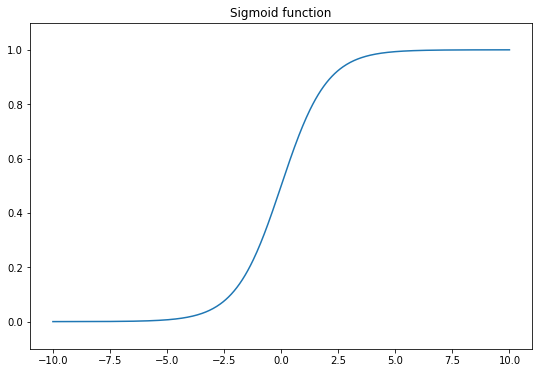

In [31]:
x = tf.linspace(-10, 10, 500)
x = tf.cast(x, tf.float32)
f = lambda x : (1/20)*x + 0.6
plt.plot(x, tf.math.sigmoid(x))
plt.ylim((-0.1,1.1))
plt.title("Sigmoid function");

The log loss, or binary cross-entropy loss, is the ideal loss function for a binary classification problem with logistic regression. For each example, the log loss quantifies the similarity between a predicted probability and the example's true value. (Straight from the tutorial

In [32]:
def log_loss(y_pred, y):
  # Compute the log loss function
  ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(ce)

Tensorflow Core API has automatic differentiation so there is behind the scenes math that the gradient tape function uses to do gradient updates with logistic regression and log loss

I'm not going to copy all that math here so here's the model from the tutorial

In [33]:
class LogisticRegression(tf.Module):

  def __init__(self):
    self.built = False
    
  def __call__(self, x, train=True):
    # Initialize the model parameters on the first call
    if not self.built:
      # Randomly generate the weights and the bias term
      rand_w = tf.random.uniform(shape=[x.shape[-1], 1], seed=22)
      rand_b = tf.random.uniform(shape=[], seed=22)
      self.w = tf.Variable(rand_w)
      self.b = tf.Variable(rand_b)
      self.built = True
    # Compute the model output
    z = tf.add(tf.matmul(x, self.w), self.b)
    z = tf.squeeze(z, axis=1)
    if train:
      return z
    return tf.sigmoid(z)

To validate, make sure the untrained model outputs values in the range of (0, 1) for a small subset of the training data. (Straight from the tutorial)

In [34]:
log_reg = LogisticRegression()

In [35]:
y_pred = log_reg(x_train_norm[:5], train=False)
y_pred.numpy()

array([0.9378799 , 0.7555106 , 0.54012686, 0.02920068, 0.06233917],
      dtype=float32)

In [36]:
def predict_class(y_pred, thresh=0.5):
  # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
  return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
  # Return the proportion of matches between `y_pred` and `y`
  y_pred = tf.math.sigmoid(y_pred)
  y_pred_class = predict_class(y_pred)
  check_equal = tf.cast(y_pred_class == y,tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val

Splitting up the dataset into batches using tensorflow magic

In [37]:
batch_size = 64
#train_datasetK = tf.data.Dataset.from_tensor_slices((x_trainK_norm, y_trainK))
#train_datasetK = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
#test_datasetK = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
#test_datasetK = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)

Training loop. Using the log loss and gradient and all the good stuff to update the parameters. Lots to look over here

In [38]:
# Set training parameters
epochs = 200
learning_rate = 0.01
train_losses, test_losses = [], []
train_accs, test_accs = [], []

# Set up the training loop and begin training
for epoch in range(epochs):
  batch_losses_train, batch_accs_train = [], []
  batch_losses_test, batch_accs_test = [], []

  # Iterate over the training data
  for x_batch, y_batch in train_dataset:
    with tf.GradientTape() as tape:
      y_pred_batch = log_reg(x_batch)
      batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Update the parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, log_reg.variables)
    for g,v in zip(grads, log_reg.variables):
      v.assign_sub(learning_rate * g)
    # Keep track of batch-level training performance
    batch_losses_train.append(batch_loss)
    batch_accs_train.append(batch_acc)

  # Iterate over the testing data
  for x_batch, y_batch in test_dataset:
    y_pred_batch = log_reg(x_batch)
    batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Keep track of batch-level testing performance
    batch_losses_test.append(batch_loss)
    batch_accs_test.append(batch_acc)

  # Keep track of epoch-level model performance
  train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
  test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
  train_losses.append(train_loss)
  train_accs.append(train_acc)
  test_losses.append(test_loss)
  test_accs.append(test_acc)
  if epoch % 20 == 0:
    print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")

Epoch: 0, Training log loss: 0.522
Epoch: 20, Training log loss: 0.293
Epoch: 40, Training log loss: 0.228
Epoch: 60, Training log loss: 0.195
Epoch: 80, Training log loss: 0.174
Epoch: 100, Training log loss: 0.160
Epoch: 120, Training log loss: 0.150
Epoch: 140, Training log loss: 0.142
Epoch: 160, Training log loss: 0.135
Epoch: 180, Training log loss: 0.130


# Inference

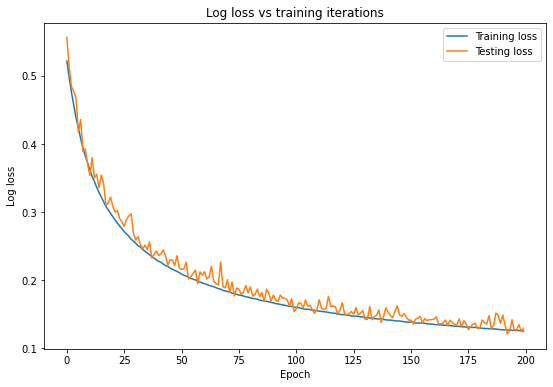

In [39]:
plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations");

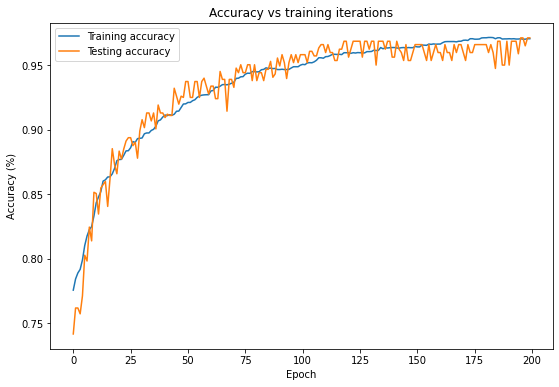

In [40]:
plt.plot(range(epochs), train_accs, label = "Training accuracy")
plt.plot(range(epochs), test_accs, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");

In [41]:
print(f"Final training log loss: {train_losses[-1]:.3f}")
print(f"Final testing log Loss: {test_losses[-1]:.3f}")

Final training log loss: 0.126
Final testing log Loss: 0.130


In [42]:
print(f"Final training accuracy: {train_accs[-1]:.3f}")
print(f"Final testing accuracy: {test_accs[-1]:.3f}")

Final training accuracy: 0.971
Final testing accuracy: 0.971


Some fancy exporting. More details later

In [43]:
class ExportModule(tf.Module):
  def __init__(self, model, norm_x, class_pred):
    # Initialize pre- and post-processing functions
    self.model = model
    self.norm_x = norm_x
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, None], dtype=tf.float32)])
  def __call__(self, x):
    # Run the `ExportModule` for new data points
    x = self.norm_x.norm(x)
    y = self.model(x, train=False)
    y = self.class_pred(y)
    return y

In [44]:
log_reg_export = ExportModule(model=log_reg,
                              norm_x=norm_x,
                              class_pred=predict_class)

In [45]:
log_reg_export

In [46]:
models = 'Project3:VDP'
save_path = os.path.join(models, 'log_reg_export')
tf.saved_model.save(log_reg_export, save_path)

Next bit is for loading saved model

In [59]:

log_reg_loaded = tf.saved_model.load(save_path)
test_preds = log_reg_loaded(x_train)
test_preds[:10].numpy()

array([1., 1., 1., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)

In [48]:
test_preds[10]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [49]:
test1 = log_reg_loaded(x_train)

In [50]:
test1[2]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
x_test


In [52]:
log_reg_loaded.signatures.keys()

KeysView(_SignatureMap({'serving_default': <ConcreteFunction signature_wrapper(*, x) at 0x7F623380E610>}))

In [53]:
import tensorflow as tf

#Path
model_dir = 'Project3:VDP/log_reg_export'
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
x_test